In [1]:
# ========================================================================
# Set notebook theme.
# Themes from: https://github.com/dunovank/jupyter-themes
# ========================================================================

# Check if style exists, else download it:
from os.path import isfile

style_file = "grade3.css"
if not isfile(style_file):
    !curl https://raw.githubusercontent.com/dunovank/jupyter-themes/master/jupyterthemes/styles/compiled/grade3.css -o grade3.css

# Load and apply style:  
from IPython.core.display import HTML

def css_styling():
    style = open(style_file, "r").read()
    return HTML("<style>" + style + "</style>")

css_styling()

# Handwritten digits classification problem

Along this notebook I'll explain how to use the power of cloud computing using Azure Notebooks with a classical example: the handwritten digits classification problem using the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).

For this classification problem we will use an architecture based on the **LeNet-5** ([*LeCunn et. al, 1998*](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)), a known Convolutional Neural Network (CNN) architecture which will be described below.

<br>
The main Python package that we'll be using is [Keras](https://keras.io/).

### Problem statement:

Before we tackle the problem with CNNs, let's understand what we'll be doing: 
If we write a digit, we want to be able to determine what digit we have written.

#### What do we need to do?
Train a Deep Learning model (in this case) using a known dataset: [MNIST](https://en.wikipedia.org/wiki/MNIST_database).

## The MNIST dataset

In [2]:
url = 'https://en.wikipedia.org/wiki/MNIST_database'
iframe = '<iframe src=' + url + ' width="100%" height=350></iframe>'
HTML(iframe)

<center>
    ![MNIST example](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)
    <span style="font-size:0.8em;">Source: Wikipedia.</span>
</center>

### Data preprocessing
<br>
**Good news:**

*The MNIST dataset is already included in the Keras lib.*

We just need to import it and split the dataset into training and testing subsets (in order to do a posterior test of accuracy).

### Importing the dataset:

In [3]:
# Importing dataset from Keras:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy

# We will fix a random seed for reproducibility:
seed = 11
numpy.random.seed(seed)

Using TensorFlow backend.


11493376/11490434 [==============================] - 3s 0us/step
First label from training dataset: 5


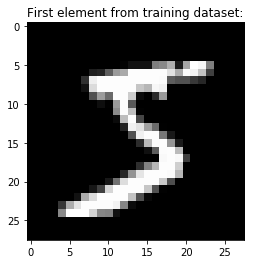

In [4]:
# Load data:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display first element from (X_train, y_train):
plt.title("First element from training dataset:")
plt.imshow(X_train[0], cmap="gray")
print("First label from training dataset: {}".format(y_train[0]))

### Preprocess dataset:

In [5]:
# Reshape to be [samples][pixels][width][height]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# Normalize inputs from 0-255 to 0-1:
X_train = X_train / 255
X_test = X_test / 255

# One hot encode outputs: 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Let's checkout changes:
print("New dimensions of first element in training set: {}".format(X_train[0].shape))
print("New label of first element in training set: {}".format(y_train[0]))

New dimensions of first element in training set: (1, 28, 28)
New label of first element in training set: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


## Let's talk about the model...

We will be using a model based in the LeNet-5, which is a CNN with the following architecture:

<center>
    <img src="LeNet-5.png" width="70%">
    <span style="font-size:0.5em;">Source: ([*"Gradient-Based Learning Applied to Document Recognition", LeCunn et. al, 1998*](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf))</span>
</center>

### Our architecture:

<center>
    <img src="model.svg" width="100%">
    <span style="font-size:0.8em;">Created with: [*"convnet-drawer"*, see GitHub repo.](https://github.com/yu4u/convnet-drawer)</span>
</center>

### Let's create the model with Keras!

First of all, let's import what we'll use:

In [6]:
# Let's import our Keras stuff:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras import backend as K
K.set_image_dim_ordering('th')

In [7]:
def Pimped_LeNet5():
    """CNN model based on LeNet-5."""
    
    # Create model:
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.2))  # Let's try to avoid overfitting...
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

### Our architecture:

<center>
    <img src="model.svg" width="100%">
    <span style="font-size:0.8em;">Created with: [*"convnet-drawer"*, see GitHub repo.](https://github.com/yu4u/convnet-drawer)</span>
</center>

#### Useful resources:

- Sequential model: https://keras.io/getting-started/sequential-model-guide/
- What is *Dropout*?: http://jmlr.org/papers/v15/srivastava14a.html

### Building the model:

In [8]:
# Build the model:
model = Pimped_LeNet5()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               48128     
__________

### Training the model:

In [9]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 283s 5ms/step - loss: 0.3982 - acc: 0.8758 - val_loss: 0.0862 - val_acc: 0.9736
Epoch 2/10
60000/60000 [==============================] - 302s 5ms/step - loss: 0.0994 - acc: 0.9688 - val_loss: 0.0496 - val_acc: 0.9841
Epoch 3/10
60000/60000 [==============================] - 288s 5ms/step - loss: 0.0721 - acc: 0.9775 - val_loss: 0.0414 - val_acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 283s 5ms/step - loss: 0.0591 - acc: 0.9814 - val_loss: 0.0337 - val_acc: 0.9891
Epoch 5/10
60000/60000 [==============================] - 275s 5ms/step - loss: 0.0515 - acc: 0.9840 - val_loss: 0.0329 - val_acc: 0.9896
Epoch 6/10
60000/60000 [==============================] - 275s 5ms/step - loss: 0.0446 - acc: 0.9857 - val_loss: 0.0294 - val_acc: 0.9904
Epoch 7/10
60000/60000 [==============================] - 281s 5ms/step - loss: 0.0401 - acc: 0.9874 - val_loss: 0.0292 - 

### Evaluating the results:

In [10]:
# Final evaluation of the model:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test score:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 26s 3ms/step
Test score: 0.0270939914132
Test accuracy: 0.99


## Saving a model:

We will basically do two things:

1. Serialize the model into a JSON file, which will save the architecture of our model.
2. Serialize the weights into a HDF5 file, which will save all parameters of our model.

In [11]:
# Serialize model to JSON:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5 (h5py needed):
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


## Loading a model:

We will basically do two things:

1. Load the model from a JSON file.
2. Load the weights from a HDF5 file.

In [14]:
# Load json and create model:
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into loaded model:
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Evaluate loaded model:

In [15]:
# Evaluate loaded model on test data:
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 26s 3ms/step
Test score: 0.005090121821
Test accuracy: 0.998019996452


#### Predicting from an image

Now that we have a model, how do we use it?

It is as simple as follows:

In [17]:
# Remembering that the first image from the training set is a 5:
print("OHE label: {}".format(y_train[0]))
print("So, the 0-9 label would be: {}".format(numpy.argmax(y_train[0])))
print()

# Let's now print a prediction:
print("Prediction of first image: {}".format(model.predict(X_train[0:1])))
print("So, the 0-9 prediction would be: {}".format(numpy.argmax(model.predict(X_train[0:1]))))
print()

OHE label: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
So, the 0-9 label would be: 5

Prediction of first image: [[  1.71112430e-10   1.16189128e-07   6.36045172e-09   8.99582170e-03
    3.44224493e-09   9.90989149e-01   4.61979122e-09   1.63377649e-07
    5.70608506e-07   1.42114277e-05]]
So, the 0-9 prediction would be: 5

